# Homework 2
## James Hamski
*Problem:
Approximate the function z = 2x^2 - 3y^2 + 1 (no noise). Train the network using the following two loss functions: mean absolute value, mean squared error. What is the difference in performance on your test set? How numerically stable are these results?*

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, adam


import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Training Set Generation

In [3]:
# create an XY grid from -10 to 10 at 0.1 increments, calculate Z using the polynomial

xy_range = np.arange(-10, 10.1, 0.1)

X = np.repeat(xy_range, len(xy_range))
Y = np.tile(xy_range, len(xy_range))
Z = 2 * (X **2) - 3 * (Y**2) + 1

XY_data = np.vstack((X,Y)).T

## Function Approximation - Mean Absolute Error Loss Function

In [4]:
sgd = SGD(lr=0.5)

In [5]:
model = Sequential()
model.add(Dense(100, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='sgd')

model.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=2)

Epoch 1/80
1s - loss: 65.0921
Epoch 2/80
1s - loss: 23.1096
Epoch 3/80
1s - loss: 16.9601
Epoch 4/80
2s - loss: 14.2495
Epoch 5/80
1s - loss: 12.7516
Epoch 6/80
1s - loss: 11.6432
Epoch 7/80
1s - loss: 10.8507
Epoch 8/80
1s - loss: 10.3206
Epoch 9/80
1s - loss: 9.7871
Epoch 10/80
2s - loss: 9.4723
Epoch 11/80
2s - loss: 9.1007
Epoch 12/80
2s - loss: 9.5954
Epoch 13/80
1s - loss: 8.9078
Epoch 14/80
1s - loss: 8.6218
Epoch 15/80
1s - loss: 8.2572
Epoch 16/80
1s - loss: 8.1590
Epoch 17/80
1s - loss: 7.7642
Epoch 18/80
1s - loss: 7.6134
Epoch 19/80
1s - loss: 7.5571
Epoch 20/80
1s - loss: 7.3417
Epoch 21/80
1s - loss: 7.1937
Epoch 22/80
1s - loss: 7.0694
Epoch 23/80
1s - loss: 6.9195
Epoch 24/80
3s - loss: 6.8655
Epoch 25/80
3s - loss: 6.7638
Epoch 26/80
2s - loss: 6.7150
Epoch 27/80
2s - loss: 6.5010
Epoch 28/80
3s - loss: 6.4973
Epoch 29/80
1s - loss: 6.3803
Epoch 30/80
1s - loss: 6.3109
Epoch 31/80
1s - loss: 6.3702
Epoch 32/80
1s - loss: 6.2613
Epoch 33/80
1s - loss: 6.1832
Epoch 34/80

In [6]:
score = model.evaluate(XY_data, Z, batch_size=16, verbose=2)

In [7]:
score

4.7806583917930849

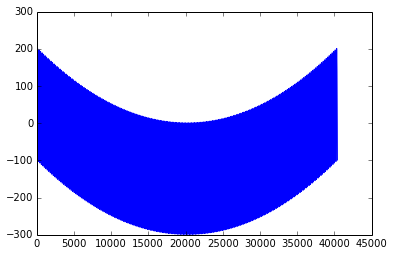

In [8]:
plt.plot(Z)

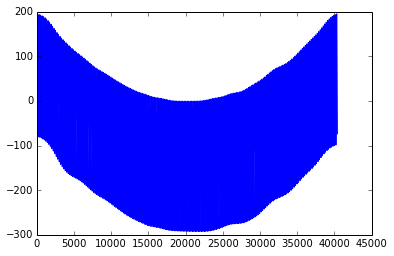

In [9]:
pred_z = model.predict(XY_data, batch_size=100)
plt.plot(pred_z)

In [10]:
error_surface_mae = Z - pred_z.reshape(40401,)

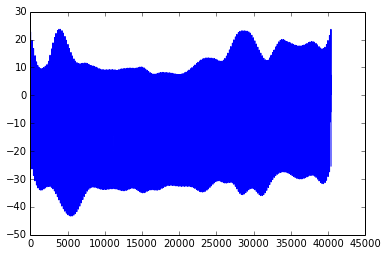

In [11]:
plt.plot(error_surface_mae)

## Function Approximation - Mean Square Error Loss Function

In [12]:
model_mse = Sequential()
model_mse.add(Dense(150, input_dim=2))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(80))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(1))
model_mse.compile(loss='mean_squared_error', optimizer='rmsprop')

model_mse.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=2)

Epoch 1/80
2s - loss: 5923.0974
Epoch 2/80
2s - loss: 2014.1966
Epoch 3/80
2s - loss: 1100.8038
Epoch 4/80
2s - loss: 558.7950
Epoch 5/80
3s - loss: 293.4572
Epoch 6/80
3s - loss: 151.0139
Epoch 7/80
4s - loss: 78.5470
Epoch 8/80
4s - loss: 43.8589
Epoch 9/80
4s - loss: 27.2137
Epoch 10/80
3s - loss: 19.3186
Epoch 11/80
5s - loss: 15.2687
Epoch 12/80
3s - loss: 13.1782
Epoch 13/80
3s - loss: 11.8238
Epoch 14/80
3s - loss: 10.8644
Epoch 15/80
3s - loss: 10.2691
Epoch 16/80
3s - loss: 9.9195
Epoch 17/80
3s - loss: 9.5543
Epoch 18/80
3s - loss: 9.2666
Epoch 19/80
3s - loss: 8.9063
Epoch 20/80
3s - loss: 8.6283
Epoch 21/80
3s - loss: 8.4579
Epoch 22/80
3s - loss: 8.3497
Epoch 23/80
3s - loss: 8.1089
Epoch 24/80
3s - loss: 7.9098
Epoch 25/80
3s - loss: 7.6780
Epoch 26/80
3s - loss: 7.5254
Epoch 27/80
5s - loss: 7.3811
Epoch 28/80
3s - loss: 7.3600
Epoch 29/80
3s - loss: 7.2614
Epoch 30/80
3s - loss: 7.1402
Epoch 31/80
3s - loss: 7.0506
Epoch 32/80
2s - loss: 6.9332
Epoch 33/80
3s - loss: 6.

In [13]:
score_mse = model.evaluate(XY_data, Z, batch_size=16, verbose=2)

In [14]:
score_mse

4.7806583917930849

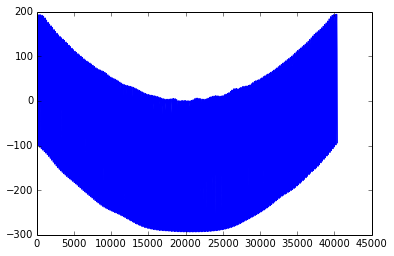

In [15]:
pred_z_mse = model_mse.predict(XY_data, batch_size=100)
plt.plot(pred_z_mse)

In [16]:
pred_z_mse = pred_z_mse.reshape(40401,)

In [17]:
error_mse = Z - pred_z_mse

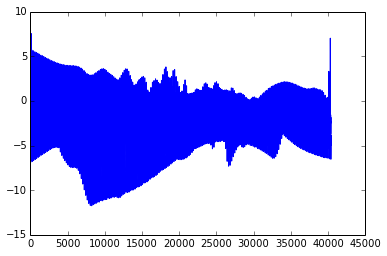

In [18]:
plt.plot(error_mse)

## Discussion

### Difference between MAE and MSE

The simple neural networks (NN) above use different loss functions but have similar performance (as judged by their mean square errors). Differences in the structure of the models are described below.

*Mean Absolute Error* 
The first model uses the mean absolute error loss function. It starts off with 100 nodes and is comprised of two layers. The stochastic gradient descent algorithm is used for optimization. The main hyperparameter I adjusted to tune the model is the number of nodes in the first layer. 

*Mean Square Error* 
I found that adding a third layer to the network greatly improved model fit when using the mean square error loss function. In addition, the model performed best using the RMSprop algorithm instead of gradient descent. 

### Numerical Stability

The final forms of the models appear to be numerically stable. However, during development the adjustment of hyperparameters often resulted in extreme changes to the model. In addition, early iterations of the model with different activation functions resulted in highly skewed errors indicating poor numeric stability.